In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture("Videos/walking.avi")

parameters_shitomasi = dict(maxCorners = 100, qualityLevel = 0.3, minDistance = 7)

parameters_lucas_kanade = dict(winSize = (15,15),maxLevel = 2,
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT , 10, 0.03))

In [2]:
colors = np.random.randint(0,255, (100,3))
colors.shape, colors.max(),colors.min()

((100, 3), 254, 0)

In [3]:
conn, frame = cap.read()

frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame_gray_init.shape,frame.shape

((576, 768), (576, 768, 3))

In [5]:
edges = cv2.goodFeaturesToTrack(frame_gray_init , mask = None, **parameters_shitomasi)

edges.shape

(38, 1, 2)

In [6]:
mask = np.zeros_like(frame)

mask.shape

(576, 768, 3)

In [7]:
for edge in edges:
    
    x,y = edge[0]
    
    cv2.circle(mask, (int(x),int(y)), 4, (255,0,0),-1)

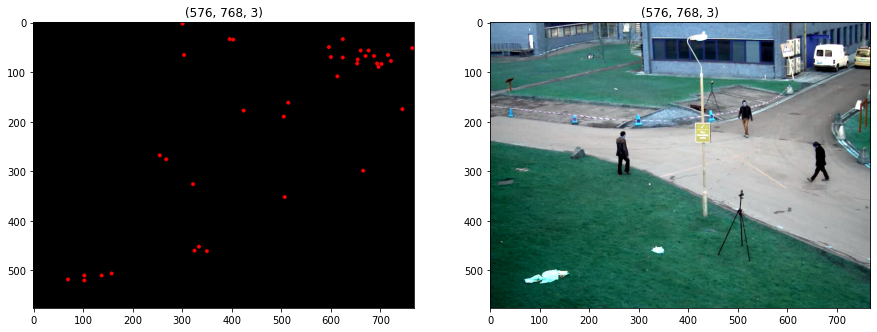

In [10]:
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.imshow(mask, cmap = "gray")
plt.title(f"{mask.shape}")

plt.subplot(122)
plt.imshow(frame ,cmap = "gray")
plt.title(f"{frame.shape}")

plt.show()

In [11]:
status = 0

edges[status == 0].shape , edges[status == 1].shape ,edges.shape

((1, 38, 1, 2), (0, 38, 1, 2), (38, 1, 2))

In [19]:
while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
        
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    new_edges, status, error = cv2.calcOpticalFlowPyrLK(frame_gray_init,frame_gray,edges,
                                                        None,**parameters_lucas_kanade)
    
    news = new_edges[status == 1]
    olds = edges[status == 1]
    
    #print(news.shape,olds.shape)
    
    for i ,(new,old) in enumerate(zip(news,olds)):
        
        a,b = new.ravel()
        c,d = old.ravel()
        
        mask = cv2.line(mask,(int(a),int(b)),(int(c),int(d)),colors[i].tolist(),2)
        frame = cv2.circle(frame, (int(a),int(b)),5,colors[i].tolist(),-1)
        
    img = cv2.add(frame,mask)
    cv2.imshow("Optical Flow Sparse",img)
    cv2.imshow("Frame",frame)
    cv2.imshow("Mask",mask)
    
    k = cv2.waitKey(1) & 0xFF 
    if k == 27:
        break
        
    frame_gray_init = frame_gray.copy()
    edges = news.reshape(-1,1,2)
    
cv2.destroyAllWindows()
cap.release()

(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) (38, 2)
(38, 2) 

In [18]:
np.random.randint(0,2,(38,2)).shape,np.random.randint(0,2,(38,2)).reshape(-1,1,2).shape

((38, 2), (38, 1, 2))

## 

In [6]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

conn,frame = cap.read()

frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

parameters_lucas_kanade = dict(winSize = (15,15), maxLevel = 4,
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

def select_point(event, x, y, flags, params):
    
    global point,selected_point, old_points
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        point = (x,y)
        selected_point = True
        old_points = np.array([[x,y]], dtype = np.float32)
        
cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame",select_point)

selected_point = False
point = ()
old_points = np.array([[]])
mask = np.zeros_like(frame)

while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
        
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if selected_point == True:
        
        cv2.circle(frame,point,5,(0,0,255),2)
        
        new_points, status, errors = cv2.calcOpticalFlowPyrLK(frame_gray_init, frame_gray,old_points,
                                                             None,**parameters_lucas_kanade)
        
        frame_gray_init = frame_gray.copy()
        old_points = new_points
        
        x,y = new_points.ravel()
        j,k = old_points.ravel()
        
        print(x == j, y == k)
        
        mask = cv2.line(mask,(int(x),int(y)), (int(j),int(k)),(0,255,255),2)
        frame = cv2.circle(frame,(int(x),int(y)), 5, (0,255,0), -1)
        
    img = cv2.add(frame,mask)
    
    cv2.imshow("Frame",img)
    #cv2.imshow("Frame",frame)
    #cv2.imshow("Mask",mask)
    
    k = cv2.waitKey(1) & 0xFF 
    if k == 27:
        break
        

    
cv2.destroyAllWindows()
cap.release()

## 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
cap = cv2.VideoCapture("Videos/walking.avi")
conn, first_frame = cap.read()
frame_gray_init = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

hsv = np.zeros_like(first_frame)

np.shape(first_frame), np.shape(hsv)

((576, 768, 3), (576, 768, 3))

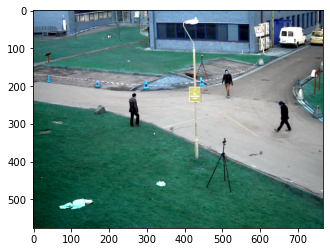

In [10]:
plt.imshow(first_frame)
plt.show()

In [11]:
# HSV

hsv[...,1] = 255
hsv.shape

(576, 768, 3)

In [13]:
hsv[0]

array([[  0, 255,   0],
       [  0, 255,   0],
       [  0, 255,   0],
       ...,
       [  0, 255,   0],
       [  0, 255,   0],
       [  0, 255,   0]], dtype=uint8)

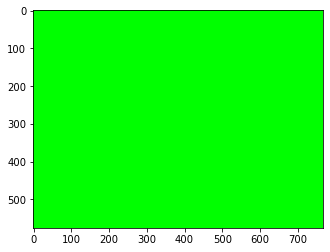

In [14]:
plt.imshow(hsv)
plt.show()

In [16]:
while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
        
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(frame_gray_init,frame_gray, None, 0.5,3, 15,3,5,1.1,0)
    
    print(flow.shape)
    
    magnitude, angle = cv2.cartToPolar(flow[...,0],flow[...,1]) # X,Y
    
    print(magnitude,angle)
    
    hsv[...,0] = angle * ( 180 / (np.pi/2))
    
    hsv[...,2] = cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX)
    
    frame_rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    cv2.imshow("Frame", frame_rgb)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    frame_gray_init = frame_gray

cv2.destroyAllWindows()
cap.release()

(576, 768, 2)
[[0.01328501 0.00808077 0.00282984 ... 0.04112058 0.05446466 0.0821045 ]
 [0.0233567  0.02091792 0.01994819 ... 0.04357164 0.05635412 0.080957  ]
 [0.02698004 0.0266053  0.02862371 ... 0.04384533 0.05524022 0.07801668]
 ...
 [0.01626017 0.02750313 0.03794137 ... 0.3054668  0.19268458 0.19794667]
 [0.00553878 0.01115864 0.01733295 ... 0.26502734 0.13660774 0.13382494]
 [0.0036881  0.00487394 0.00900626 ... 0.18754523 0.08957881 0.07785484]] [[4.0206692e-01 3.5880670e-01 4.5535684e+00 ... 4.0947127e+00
  3.9863575e+00 3.7833164e+00]
 [5.1749703e-03 5.9899335e+00 5.3775120e+00 ... 4.2223868e+00
  4.0702844e+00 3.8837326e+00]
 [7.7934447e-03 5.8918190e+00 5.3128853e+00 ... 4.2465172e+00
  4.0372286e+00 3.8967559e+00]
 ...
 [5.3157916e+00 5.3517857e+00 5.1836638e+00 ... 3.5764573e+00
  3.5358331e+00 3.4132309e+00]
 [5.0512705e+00 5.2441006e+00 4.9871860e+00 ... 3.7005482e+00
  3.6890914e+00 3.4619632e+00]
 [4.1365561e+00 4.3711424e+00 4.3158207e+00 ... 3.7811394e+00
  3.786046

(576, 768, 2)
[[0.00026642 0.00044492 0.00056169 ... 0.00188122 0.0019167  0.00274684]
 [0.00029592 0.00049413 0.00058397 ... 0.00176763 0.00187735 0.00300452]
 [0.00033526 0.00064942 0.00078419 ... 0.00180114 0.00220905 0.00340886]
 ...
 [0.00260206 0.00251175 0.00308442 ... 0.03486798 0.04533707 0.03185989]
 [0.00223363 0.00229163 0.00246095 ... 0.05684173 0.05602898 0.03496194]
 [0.00056337 0.00092504 0.00017086 ... 0.04157293 0.03292571 0.01531167]] [[5.843871   5.628988   5.214072   ... 1.5257511  1.2339777  1.5467334 ]
 [5.8844004  5.66993    5.164103   ... 1.5668949  1.3487347  1.6610844 ]
 [5.8416457  5.59851    5.0438166  ... 1.7157767  1.6582017  1.7910349 ]
 ...
 [4.9018726  5.0905447  4.4650903  ... 0.7174528  0.64088494 0.7075736 ]
 [5.067828   5.2512875  4.614471   ... 0.50639194 0.49417484 0.55699074]
 [0.23239283 0.2431809  1.7873169  ... 0.3374571  0.37918803 0.4143826 ]]
(576, 768, 2)
[[0.02765566 0.04096527 0.05202262 ... 0.00948262 0.01166373 0.01410629]
 [0.0362116

(576, 768, 2)
[[0.00059923 0.00101331 0.00129978 ... 0.02894451 0.02069222 0.00937266]
 [0.00060083 0.00096824 0.00125589 ... 0.02739668 0.0216695  0.01136574]
 [0.00055718 0.00084461 0.00112944 ... 0.02810098 0.02499904 0.01776193]
 ...
 [0.01211546 0.01244182 0.01182299 ... 0.00284789 0.00534303 0.00984778]
 [0.00769939 0.00782517 0.00752391 ... 0.00348701 0.0069666  0.01194318]
 [0.0008788  0.0007538  0.00064326 ... 0.00332828 0.00609211 0.00975898]] [[1.8495713  1.8163501  1.6323559  ... 5.3960156  5.295015   4.440968  ]
 [1.7370389  1.7072779  1.5308976  ... 5.409855   5.3208785  4.7352977 ]
 [1.5645846  1.5135589  1.3309956  ... 5.3479605  5.2677703  4.8947797 ]
 ...
 [4.8810277  4.895855   4.909601   ... 0.53523666 3.0391614  3.1861317 ]
 [5.0961256  5.088102   5.0984983  ... 0.5124317  2.9524405  3.0436254 ]
 [0.01817835 6.246649   6.184891   ... 0.5452627  2.9042642  2.9970038 ]]
(576, 768, 2)
[[0.02029095 0.02949866 0.03764373 ... 0.06851713 0.04161131 0.017815  ]
 [0.0272282

(576, 768, 2)
[[0.00799029 0.01130176 0.01271096 ... 0.01626434 0.02419858 0.02514739]
 [0.01055859 0.01479512 0.01698298 ... 0.0140326  0.01938218 0.02105174]
 [0.01170085 0.01686157 0.0200843  ... 0.01378267 0.01685596 0.01846183]
 ...
 [0.00913014 0.00922431 0.00907716 ... 0.00298348 0.00526317 0.00974662]
 [0.00376424 0.00403362 0.00428878 ... 0.00355724 0.00692595 0.01190703]
 [0.00033731 0.00033349 0.00033115 ... 0.0033685  0.00608024 0.00975166]] [[2.9249482  3.0094995  3.0558364  ... 0.3408307  0.02627624 0.04806801]
 [3.0135353  3.131194   3.224433   ... 0.52970994 0.22528613 0.2606823 ]
 [3.0101256  3.112507   3.1581647  ... 0.8171158  0.56757426 0.6342798 ]
 ...
 [4.2487206  4.27732    4.314095   ... 0.55746245 3.0125325  3.1727798 ]
 [4.6727037  4.6346955  4.608496   ... 0.5134344  2.9463925  3.0405614 ]
 [5.5407977  5.4510965  5.3389273  ... 0.54751253 2.900162   2.9949238 ]]
(576, 768, 2)
[[3.13946548e-05 4.82897449e-05 6.35529941e-05 ... 2.65607387e-02
  1.93874985e-02 2

(576, 768, 2)
[[0.06064551 0.08834455 0.10339911 ... 0.02504975 0.02703253 0.02155426]
 [0.08271894 0.11428377 0.13087171 ... 0.020386   0.0219458  0.02057639]
 [0.10285864 0.13694401 0.155592   ... 0.01555384 0.01741437 0.02174767]
 ...
 [0.02749406 0.02995613 0.04244955 ... 0.2733804  0.23083736 0.21297915]
 [0.01049055 0.00877752 0.01179805 ... 0.15498409 0.12133354 0.10095287]
 [0.0050212  0.0043788  0.00473174 ... 0.07451452 0.0580476  0.04136566]] [[0.01492397 6.279681   6.2603917  ... 0.20551093 0.17368679 0.6896141 ]
 [0.01808866 6.277949   6.2572308  ... 0.2662466  0.33918482 1.0439795 ]
 [0.03416064 0.01033705 6.2732215  ... 0.38549197 0.6048553  1.3921561 ]
 ...
 [6.179695   6.2403693  0.0791587  ... 3.0990183  3.1171312  3.1237633 ]
 [6.187611   0.00701792 0.18775263 ... 3.0965362  3.1262803  3.1212392 ]
 [6.176084   6.192235   6.2752714  ... 3.188959   3.2262673  3.2384634 ]]
(576, 768, 2)
[[0.03830548 0.05439558 0.06323437 ... 0.00481622 0.00572109 0.0093483 ]
 [0.0584895

(576, 768, 2)
[[0.03814349 0.06015322 0.07480867 ... 0.00923367 0.00833498 0.00586152]
 [0.04680539 0.07060574 0.08567952 ... 0.0128854  0.01059656 0.0061798 ]
 [0.05543238 0.08119672 0.09677164 ... 0.01782741 0.01396335 0.00774487]
 ...
 [0.00883086 0.00875587 0.00937691 ... 0.00765388 0.00824284 0.00840264]
 [0.00293652 0.00305148 0.00349475 ... 0.0078943  0.0076463  0.00745464]
 [0.00014133 0.00012153 0.00011949 ... 0.00483739 0.00429506 0.0038137 ]] [[6.0485783  6.074916   6.093738   ... 2.0382514  1.6333016  1.3306384 ]
 [6.038604   6.069227   6.0896626  ... 2.128914   1.7513994  0.97189134]
 [6.0209804  6.0542884  6.0768504  ... 2.119218   1.7784013  0.6548438 ]
 ...
 [4.2250156  4.269589   4.392354   ... 3.4618776  3.4604352  3.45424   ]
 [4.554044   4.572924   4.7075663  ... 3.3994398  3.3421953  3.3142138 ]
 [0.03457766 6.2544456  6.122954   ... 3.4472983  3.3527102  3.29464   ]]
(576, 768, 2)
[[0.03425558 0.0546893  0.06546064 ... 0.00117972 0.00122397 0.00142844]
 [0.0436021

(576, 768, 2)
[[0.01721583 0.04810426 0.07909412 ... 0.02739898 0.0275823  0.02472037]
 [0.01285986 0.04192433 0.07006852 ... 0.02631813 0.02603145 0.02306127]
 [0.01212537 0.04026867 0.06726402 ... 0.02550253 0.02336005 0.01989027]
 ...
 [0.00883427 0.00868568 0.0092154  ... 0.03036402 0.02947798 0.0258157 ]
 [0.00294275 0.00305004 0.00348961 ... 0.02465038 0.02122318 0.01703766]
 [0.00015259 0.00014214 0.00014498 ... 0.01873016 0.01552347 0.01148896]] [[0.20812161 0.13799861 0.08650582 ... 4.6519666  5.1327853  5.4471693 ]
 [0.3957909  0.19017017 0.119528   ... 4.635714   5.1126814  5.441948  ]
 [0.67497146 0.33511367 0.24334368 ... 4.6360526  5.0897036  5.439484  ]
 ...
 [4.2262187  4.2760496  4.4086976  ... 4.746656   4.7407455  4.721488  ]
 [4.563763   4.591929   4.7357774  ... 4.6259193  4.7664247  4.7081075 ]
 [6.2795696  6.232      6.149905   ... 4.8367434  5.0338497  4.942978  ]]
(576, 768, 2)
[[0.00034497 0.00189681 0.00443227 ... 0.01975141 0.02602712 0.01886165]
 [0.0002446

(576, 768, 2)
[[0.02840877 0.0362232  0.04322845 ... 0.01341971 0.0219157  0.02521204]
 [0.02893285 0.03772325 0.04599405 ... 0.0120155  0.02113124 0.03043063]
 [0.02657766 0.03484024 0.04348552 ... 0.00691423 0.01707098 0.03386486]
 ...
 [0.040404   0.0508624  0.06844594 ... 0.08394402 0.07120248 0.06512234]
 [0.0145979  0.01983322 0.02763896 ... 0.0543217  0.04027677 0.03311444]
 [0.00517879 0.00723105 0.01106167 ... 0.02884749 0.01741242 0.01213948]] [[2.416473  2.297448  2.1963456 ... 4.82556   5.100437  5.171627 ]
 [2.2974992 2.229667  2.1717048 ... 4.9165044 5.1814175 5.288722 ]
 [2.097782  2.0498238 2.0451677 ... 5.0617423 5.3495426 5.418704 ]
 ...
 [3.3221145 3.3019838 3.2661104 ... 2.2197495 1.7661834 1.6845008]
 [3.3297822 3.3006692 3.262362  ... 1.637282  1.6469393 1.5670242]
 [3.1474185 3.154284  3.1378047 ... 1.3354584 1.6708832 1.7010843]]
(576, 768, 2)
[[0.00410797 0.00650924 0.00772914 ... 0.24136284 0.19524057 0.14770332]
 [0.00385679 0.00597912 0.00697263 ... 0.205158

(576, 768, 2)
[[0.04280178 0.04747807 0.05564487 ... 0.02158127 0.02138988 0.04650442]
 [0.05450439 0.06185284 0.07443193 ... 0.01842473 0.02459012 0.05047961]
 [0.06791764 0.07706501 0.09358322 ... 0.02032292 0.02930927 0.0521244 ]
 ...
 [0.00440152 0.0077449  0.00793013 ... 0.06586389 0.0599516  0.0633287 ]
 [0.00237529 0.00498659 0.00600982 ... 0.04522428 0.03898728 0.0446255 ]
 [0.00087667 0.00156611 0.00247643 ... 0.02630906 0.02078388 0.02110937]] [[6.0170712  6.007659   6.0066957  ... 4.443399   3.5642133  2.845853  ]
 [5.880089   5.871092   5.8827076  ... 4.0944123  3.290248   2.7641397 ]
 [5.8528695  5.854695   5.871704   ... 3.8121212  3.1550245  2.7610826 ]
 ...
 [0.29648226 0.16531457 6.2452326  ... 2.730234   2.8200848  2.9291286 ]
 [0.2692459  0.13077152 6.2075534  ... 2.2550585  2.3709714  2.602559  ]
 [0.2651882  0.2055988  6.183613   ... 1.839369   2.102996   2.456471  ]]
(576, 768, 2)
[[0.00163316 0.00146902 0.00134136 ... 0.00311738 0.00771225 0.00885522]
 [0.0019891

(576, 768, 2)
[[0.00037248 0.00111207 0.00207494 ... 0.04235371 0.04083705 0.0311751 ]
 [0.00050912 0.00124536 0.00215894 ... 0.04320178 0.04171766 0.03245625]
 [0.00066262 0.00134032 0.00220262 ... 0.04321481 0.0392019  0.02877317]
 ...
 [0.00575447 0.00579195 0.00597481 ... 0.05939471 0.05029432 0.04506716]
 [0.00310883 0.00318901 0.00330119 ... 0.05918332 0.04451505 0.03521587]
 [0.00022442 0.00023134 0.00024944 ... 0.02890822 0.01858444 0.01274184]] [[1.4581385 1.8494345 1.1239272 ... 5.1316037 5.3289633 5.460041 ]
 [1.3964767 1.7400984 1.1687543 ... 5.075897  5.266808  5.40784  ]
 [1.356723  1.640566  1.1621441 ... 5.013145  5.197775  5.358928 ]
 ...
 [4.161413  4.2216644 4.329912  ... 1.9201888 1.7488185 1.8082719]
 [4.2757263 4.3023643 4.4451284 ... 1.2898632 1.2286366 1.4555969]
 [4.309651  4.3272943 4.524887  ... 1.2197001 1.2645693 1.6094216]]
(576, 768, 2)
[[3.0100855e-05 5.6971363e-05 7.7229837e-05 ... 1.4213515e-03
  2.0852825e-03 3.0986208e-03]
 [6.1967155e-05 9.6680364e-

(576, 768, 2)
[[2.7057571e-05 6.5210904e-04 7.9336209e-04 ... 2.5156799e-01
  2.2772644e-01 2.1838707e-01]
 [2.4315608e-05 6.5716536e-04 7.7566365e-04 ... 2.2152491e-01
  1.9982074e-01 1.8988764e-01]
 [2.2238362e-05 6.4167986e-04 7.3202472e-04 ... 1.9024315e-01
  1.6942024e-01 1.5869421e-01]
 ...
 [4.8532612e-03 5.1755388e-03 5.8987616e-03 ... 2.9986608e-03
  4.4402317e-03 9.8893270e-03]
 [2.4723019e-03 2.7666583e-03 3.3134620e-03 ... 4.0794262e-03
  4.6996428e-03 1.0466781e-02]
 [1.8584073e-04 2.0392599e-04 2.4700255e-04 ... 5.0994628e-03
  4.2794263e-03 7.1764607e-03]] [[6.187932   2.1260943  2.020419   ... 1.7065649  1.7451396  1.7926016 ]
 [6.1854057  2.0261195  1.9529598  ... 1.6928005  1.7287841  1.7710484 ]
 [6.161136   1.9317995  1.8851699  ... 1.6806494  1.7102834  1.7451936 ]
 ...
 [4.147283   4.28776    4.412878   ... 3.8000927  3.0133636  3.1407351 ]
 [4.344296   4.466663   4.5727763  ... 0.80905074 2.368431   2.9116237 ]
 [4.4552517  4.5444117  4.637867   ... 0.8822977  2.

(576, 768, 2)
[[0.00087345 0.00273572 0.00624453 ... 0.01982813 0.02316757 0.00725202]
 [0.00270682 0.00497094 0.0085213  ... 0.0168004  0.01823666 0.00298344]
 [0.00665064 0.00820374 0.00955529 ... 0.01426299 0.01301324 0.01178426]
 ...
 [0.00588443 0.00642246 0.0075761  ... 0.00039748 0.00357956 0.00584776]
 [0.00309161 0.00354751 0.00441147 ... 0.00054739 0.00413499 0.00621054]
 [0.00034385 0.00036117 0.00040784 ... 0.00065361 0.00312953 0.00432585]] [[5.9738584 4.7304845 4.326934  ... 5.641183  5.544226  5.2343907]
 [5.8217964 5.1371984 4.7115974 ... 5.67808   5.527008  2.9371018]
 [6.019777  5.590405  4.996362  ... 5.615784  5.4514666 2.5103211]
 ...
 [4.157065  4.2825966 4.393722  ... 1.3256378 3.1056828 3.271901 ]
 [4.3628125 4.481253  4.526922  ... 1.4175764 2.9801068 3.1081567]
 [4.0122056 4.0731606 4.1975164 ... 1.4423991 2.8484228 2.9939613]]
(576, 768, 2)
[[0.01493938 0.01614908 0.00227025 ... 0.02577574 0.03407281 0.0375188 ]
 [0.01774592 0.02035789 0.00244857 ... 0.022152

(576, 768, 2)
[[4.0924322e-05 4.6977185e-04 1.0357824e-03 ... 1.4534159e-02
  1.5595589e-02 1.2628221e-02]
 [4.6014211e-05 4.6319957e-04 1.0070240e-03 ... 1.4462124e-02
  1.5897382e-02 1.2960501e-02]
 [5.8841360e-05 4.9856910e-04 1.0768691e-03 ... 1.4187404e-02
  1.5681002e-02 1.3465379e-02]
 ...
 [4.1760663e-03 4.5097158e-03 5.5187568e-03 ... 3.3963898e-03
  3.9506657e-03 4.1011176e-03]
 [2.0253882e-03 2.2535035e-03 2.9286377e-03 ... 1.1087456e-03
  2.0679596e-03 2.7956057e-03]
 [1.2703049e-04 1.3588625e-04 1.7054133e-04 ... 6.4482976e-04
  1.2437602e-03 1.8028285e-03]] [[6.170296   1.2828059  0.723541   ... 1.9668114  1.7787697  1.0932399 ]
 [6.251244   1.2009479  0.66830575 ... 1.9457332  1.7826501  1.1888096 ]
 [6.222727   1.0197688  0.59951586 ... 1.9029552  1.7642587  1.2823254 ]
 ...
 [4.201942   4.3113294  4.3808775  ... 4.316793   4.3341527  4.575747  ]
 [4.486832   4.559423   4.541723   ... 4.6257296  4.556928   4.97629   ]
 [4.5000043  4.5492873  4.4968257  ... 3.9413993  4.

(576, 768, 2)
[[7.6650949e-08 7.4007680e-08 9.3355411e-08 ... 5.2819909e-03
  1.1921098e-02 1.3760534e-02]
 [1.2698446e-07 1.2011064e-07 1.2481998e-07 ... 6.9286274e-03
  1.4291250e-02 1.7548740e-02]
 [1.9214110e-07 8.6928587e-08 3.8121104e-08 ... 8.3935503e-03
  1.7083157e-02 2.2146290e-02]
 ...
 [4.8079351e-03 6.1478326e-03 7.3974794e-03 ... 4.0935031e-03
  2.9250777e-03 7.8433333e-03]
 [2.4411019e-03 3.0866035e-03 3.8126966e-03 ... 4.5257057e-03
  3.9333422e-03 8.9217434e-03]
 [1.3535279e-04 1.5053702e-04 1.8398173e-04 ... 3.7736252e-03
  3.5704079e-03 6.3913423e-03]] [[0.4833676  1.9891381  2.3876457  ... 5.776515   5.748846   5.8786607 ]
 [0.6324939  1.6207644  1.9267246  ... 6.0014157  5.8357687  5.8704114 ]
 [0.35287404 0.77539825 0.74591637 ... 6.226266   5.898514   5.862987  ]
 ...
 [4.273852   4.489704   4.5663295  ... 0.5119436  2.5269284  3.1230829 ]
 [4.4925036  4.650743   4.6904006  ... 0.5211837  2.5163615  2.9633408 ]
 [4.5659575  4.663964   4.734929   ... 0.70056754 2.

(576, 768, 2)
[[0.01903923 0.03425742 0.04294929 ... 0.00669564 0.00613092 0.00723763]
 [0.01453962 0.02654966 0.0337014  ... 0.00711299 0.00635479 0.0070745 ]
 [0.00923485 0.01352485 0.01920033 ... 0.0071067  0.00616421 0.00718816]
 ...
 [0.00611587 0.01047377 0.01458415 ... 0.00451378 0.00491676 0.01142158]
 [0.00295475 0.00488296 0.00841851 ... 0.00468151 0.0055117  0.01154449]
 [0.00066811 0.000942   0.00349838 ... 0.00339946 0.00319599 0.00619272]] [[2.7210937  2.817628   2.8687515  ... 1.4798437  1.2234482  1.4978261 ]
 [2.380126   2.630904   2.7585516  ... 1.4399465  1.2308799  1.4481736 ]
 [1.3753817  2.2715569  2.6750276  ... 1.3610251  1.2290545  1.516095  ]
 ...
 [4.240017   4.0690975  3.9056485  ... 0.57970273 3.0036042  3.2611556 ]
 [4.5954347  4.1870284  3.8452587  ... 0.52575076 3.0152373  3.16061   ]
 [5.743261   4.502204   3.5764306  ... 0.67543286 2.876615   3.0935068 ]]
(576, 768, 2)
[[2.5504601e-06 5.0656422e-06 1.1071052e-05 ... 5.1834695e-02
  6.8702333e-02 1.0007

(576, 768, 2)
[[0.02700809 0.04554669 0.05573269 ... 0.01153449 0.02498638 0.07185411]
 [0.02152347 0.03598956 0.04439659 ... 0.01928894 0.0327891  0.07420328]
 [0.01164499 0.01950844 0.0269856  ... 0.02508371 0.04029867 0.07619966]
 ...
 [0.00850806 0.00897999 0.00975449 ... 0.00747938 0.00329569 0.01134399]
 [0.0052665  0.00563854 0.00648976 ... 0.00766801 0.00417385 0.01205322]
 [0.00134014 0.00149593 0.0034179  ... 0.00551186 0.00274704 0.00683116]] [[2.7011085 2.7870483 2.8356853 ... 1.8862408 2.01093   2.1926184]
 [2.425079  2.6378684 2.753876  ... 2.0811336 2.082866  2.1874058]
 [1.8508779 2.480507  2.7634654 ... 2.137261  2.0890634 2.1536038]
 ...
 [4.389713  4.3312063 4.213535  ... 0.5789875 2.5902839 3.2442734]
 [4.333392  4.2041984 3.9728498 ... 0.5202155 2.793584  3.145794 ]
 [3.7596562 3.4609568 3.2551014 ... 0.6461053 2.5859814 3.0585742]]
(576, 768, 2)
[[0.00207436 0.00242261 0.00252862 ... 0.00056239 0.0059311  0.00420245]
 [0.00228078 0.00252349 0.00255299 ... 0.002678

(576, 768, 2)
[[3.04252803e-02 5.13851345e-02 6.13021776e-02 ... 1.43359015e-02
  1.47693539e-02 1.15506956e-02]
 [2.49251630e-02 3.92635241e-02 4.62017693e-02 ... 1.18811447e-02
  1.15014762e-02 1.15638571e-02]
 [2.17501801e-02 2.12348998e-02 2.18272321e-02 ... 1.01368967e-02
  9.28932894e-03 1.16000837e-02]
 ...
 [6.07706234e-03 6.33777026e-03 6.49540313e-03 ... 1.60756317e-05
  2.06539517e-05 2.92980967e-05]
 [3.51870595e-03 3.76007892e-03 3.98445595e-03 ... 8.02789873e-06
  8.94415916e-06 1.90271257e-05]
 [2.01040821e-04 2.19962880e-04 2.43199960e-04 ... 7.54095890e-06
  3.96288260e-06 7.43972760e-06]] [[2.5320475  2.6658754  2.734472   ... 5.2342854  5.011398   4.0333543 ]
 [2.0890055  2.4028227  2.5648973  ... 5.1709957  4.856354   4.0740066 ]
 [1.0841652  1.6443584  2.1483946  ... 5.0728483  4.6206603  4.070069  ]
 ...
 [4.496287   4.5345836  4.6456766  ... 5.1645947  4.0832934  3.7486584 ]
 [4.597409   4.6018023  4.741682   ... 5.620568   3.738195   3.3386168 ]
 [0.37141675 0.3

(576, 768, 2)
[[0.00188862 0.00354739 0.00369426 ... 0.00743749 0.0077068  0.00780709]
 [0.00163765 0.00249656 0.00261567 ... 0.00741292 0.00871515 0.00764204]
 [0.00219045 0.00188617 0.00201438 ... 0.00683218 0.00855273 0.00643508]
 ...
 [0.01760742 0.03079183 0.04550296 ... 0.00915307 0.02123208 0.03497807]
 [0.01158358 0.02254076 0.03486452 ... 0.00611882 0.00870193 0.01960478]
 [0.00578952 0.01291982 0.02276215 ... 0.00548351 0.00467079 0.01007163]] [[1.9074595  2.3758876  2.3123364  ... 4.809655   5.352474   5.9267745 ]
 [1.4444665  2.138546   2.0389686  ... 4.8735147  5.4016814  5.9466133 ]
 [0.95883304 1.5924876  1.4404196  ... 4.9502115  5.4931297  6.1616354 ]
 ...
 [3.3075855  3.3066058  3.2848334  ... 4.460196   3.7608511  3.6414824 ]
 [3.3364744  3.3180048  3.2850232  ... 0.7500186  2.9388645  3.1274717 ]
 [3.1090775  3.1593008  3.1481168  ... 0.792117   2.7219572  3.0157437 ]]
(576, 768, 2)
[[0.0233585  0.0432906  0.05443598 ... 0.12772441 0.15764679 0.2194191 ]
 [0.0217764

(576, 768, 2)
[[0.03327579 0.05377832 0.06110893 ... 0.00855802 0.00911917 0.01194636]
 [0.04210262 0.06497291 0.07225544 ... 0.00860072 0.00923076 0.01177329]
 [0.05608593 0.08059095 0.08577397 ... 0.00771715 0.00841955 0.01007316]
 ...
 [0.00485449 0.0056253  0.00748025 ... 0.00347403 0.01057349 0.02114706]
 [0.00264202 0.00328467 0.00451983 ... 0.00342818 0.01253064 0.02254226]
 [0.00146479 0.0016429  0.00231375 ... 0.00313841 0.00866832 0.01389034]] [[6.21888    6.132103   6.0639963  ... 1.4304044  1.0032071  0.3663147 ]
 [6.1973095  6.1228285  6.054858   ... 1.4158949  1.0339552  0.40935135]
 [6.2432294  6.16252    6.0832224  ... 1.3865143  1.0645137  0.5973251 ]
 ...
 [1.0608795  1.3885597  1.5230469  ... 0.97453904 3.0657728  3.2451415 ]
 [0.9880665  1.4477807  1.6221377  ... 1.0593102  2.9895813  3.0988355 ]
 [0.77451736 1.327206   1.5769485  ... 1.2688849  2.8358147  2.9476948 ]]
(576, 768, 2)
[[0.00279875 0.00407526 0.00451457 ... 0.0118708  0.01392292 0.01614187]
 [0.0030279

(576, 768, 2)
[[1.3473685e-06 1.6788506e-06 1.5516026e-06 ... 1.0728161e-02
  9.6189734e-03 9.4152195e-03]
 [1.8102376e-06 2.2153888e-06 2.0713005e-06 ... 1.0823209e-02
  9.7891595e-03 1.0059059e-02]
 [2.3659070e-06 2.8068239e-06 2.5830782e-06 ... 1.0637571e-02
  9.8322695e-03 1.1221462e-02]
 ...
 [6.3714581e-03 6.4869002e-03 7.0367246e-03 ... 8.1091173e-02
  5.3464316e-02 6.1921414e-02]
 [3.6310381e-03 3.8291912e-03 4.2722747e-03 ... 4.7745593e-02
  3.9474718e-02 4.2908061e-02]
 [4.8918929e-04 6.1378849e-04 8.8055199e-04 ... 1.4532148e-02
  1.7009001e-02 1.8521212e-02]] [[6.1323314  6.1263833  6.0722027  ... 1.5731897  1.2159626  1.053988  ]
 [6.2794065  6.2518654  6.2004485  ... 1.5718199  1.2452526  1.2257428 ]
 [0.08140206 0.0442364  6.271118   ... 1.5753014  1.293038   1.4183621 ]
 ...
 [4.3294744  4.182291   4.1670485  ... 3.275858   3.239862   3.302965  ]
 [4.5696187  4.316294   4.2483025  ... 3.0987217  3.125271   3.169149  ]
 [4.713522   3.9061925  3.7811062  ... 2.7957044  2.

(576, 768, 2)
[[4.03229296e-02 6.63761422e-02 7.52730817e-02 ... 4.57623089e-03
  6.63820701e-03 7.08977692e-03]
 [5.06465212e-02 7.94537589e-02 8.88181329e-02 ... 5.12122409e-03
  7.99006782e-03 7.82053638e-03]
 [6.61733001e-02 9.66623798e-02 1.04719035e-01 ... 5.11502521e-03
  8.07078835e-03 6.76274626e-03]
 ...
 [1.42554476e-04 2.75068014e-04 3.08705785e-04 ... 6.08235458e-03
  3.65641876e-03 1.07654892e-02]
 [1.08856060e-04 2.37584172e-04 2.71807512e-04 ... 6.15382008e-03
  4.57826583e-03 1.13394065e-02]
 [8.84687470e-05 1.56759575e-04 1.78904054e-04 ... 4.69068903e-03
  3.12984176e-03 6.78860489e-03]] [[6.149829   6.066999   6.0118656  ... 1.9009513  2.01907    1.9562987 ]
 [6.121795   6.0556407  6.0032063  ... 1.9446826  2.0497713  1.9415528 ]
 [6.1643543  6.090368   6.0281224  ... 1.9409314  2.044092   1.8603109 ]
 ...
 [1.5589703  2.4430628  2.4302256  ... 0.6152888  2.6910014  3.2076094 ]
 [1.5723441  2.5145922  2.5242877  ... 0.5818004  2.7843328  3.0914361 ]
 [1.6352401  2.3